In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from plot_series_arima import tots, fromts
import warnings
from pyculiarity import detect_ts
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
with open('data/all_apps_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [10]:
num_items = df.groupby(['app'])['item_name'].nunique()

In [21]:
num_items = num_items.sort_values(ascending=False)

In [16]:
with open('steam_capstone/key_to_apps_dict.txt') as f:
    key_to_app = eval(f.read())

### 10 games with the most unique items

In [121]:
for _id, items in zip(num_items.index[:10], num_items[:10]):
    print(key_to_app[str(_id)], ':', items)

Team Fortress 2 : 31570
Dota 2 : 31337
Counter-Strike: Global Offensive : 10758
Unturned : 6072
PAYDAY 2 : 3899
Killing Floor 2 : 2043
Rust : 1329
#monstercakes : 1174
Ballistic Overkill : 992
Primal Carnage: Extinction : 725


### Largest estimated economy on Jun 30 2018

In [60]:
dfjun30 = df[df.date == 1530334800.0]

In [61]:
dfjun30['approx_sale'] = dfjun30['median_sell_price'] * dfjun30['quantity']

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
jun30_econ = dfjun30.groupby('app')['approx_sale'].sum()

In [64]:
jun30_econ = jun30_econ.sort_values(ascending=False)

In [66]:
jun30_econ.index = [key_to_app[str(x)] for x in jun30_econ.index]

## Approximate total economy of items for each game on Jun 30 2018

In [68]:
jun30_econ[:10]

Counter-Strike: Global Offensive    723276.615
PLAYERUNKNOWN'S BATTLEGROUNDS       343935.066
Dota 2                              302662.021
Team Fortress 2                      69308.164
H1Z1                                 28371.232
Rust                                 22767.461
Black Squad                           8374.062
PAYDAY 2                              7002.922
Killing Floor 2                       6425.348
Unturned                              2481.226
Name: approx_sale, dtype: float64

### Number of transactions:

In [128]:
jun30_quant = df[df.date == 1530334800.0].groupby('app')['quantity'].sum().sort_values(ascending=False)
jun30_quant.index = [key_to_app[str(x)] for x in jun30_quant.index]
jun30_quant[:10]

Counter-Strike: Global Offensive    483855
Dota 2                              237710
PLAYERUNKNOWN'S BATTLEGROUNDS       232823
PAYDAY 2                             75348
Team Fortress 2                      48058
Killing Floor 2                      28340
H1Z1                                 20578
Rust                                 17608
Unturned                             12060
Just Survive                         10171
Name: quantity, dtype: int64

In [136]:
(jun30_econ/jun30_quant).loc[jun30_quant.index][:10]

Counter-Strike: Global Offensive    1.494821
Dota 2                              1.273241
PLAYERUNKNOWN'S BATTLEGROUNDS       1.477238
PAYDAY 2                            0.092941
Team Fortress 2                     1.442177
Killing Floor 2                     0.226724
H1Z1                                1.378717
Rust                                1.293018
Unturned                            0.205740
Just Survive                        0.092538
dtype: float64

I'll start doing more work on PUBG, and that will be an easy dataset to work with. CSGO seems like a good one to have been working on. The economy of TF2 drops off and the data would take an incredible amount of time to be put into useable shape. Some items can be different colors or have different effects that are sold under the same item name, but would sell for vastly different prices making the data for those items unuseable. I would have to figure out which items fall under that category and which don't, then find a way to systematically remove those data points.
___

## Approximate total economy of items for each game on Jun 30 2017

In [75]:
dfjun2017 = df[df.date == tots('Jun 30 2017')]

dfjun2017['approx_sale'] = dfjun2017['median_sell_price'] * dfjun2017['quantity']

jun2017_econ = dfjun2017.groupby('app')['approx_sale'].sum()

jun2017_econ = jun2017_econ.sort_values(ascending=False)

jun2017_econ.index = [key_to_app[str(x)] for x in jun2017_econ.index]

jun2017_econ[:10]

### Number of transactions:

In [130]:
jun2017_quant = df[df.date == tots('Jun 30 2017')].groupby('app')['quantity'].sum().sort_values(ascending=False)
jun2017_quant.index = [key_to_app[str(x)] for x in jun2017_quant.index]
jun2017_quant[:10]

Counter-Strike: Global Offensive    906169
Dota 2                              306953
PAYDAY 2                             55463
Team Fortress 2                      53300
PLAYERUNKNOWN'S BATTLEGROUNDS        31382
H1Z1                                 28086
Rust                                 19020
Unturned                             14768
Killing Floor 2                       6684
Don't Starve Together                 6558
Name: quantity, dtype: int64

### Average transaction value

In [135]:
(jun2017_econ/jun2017_quant).loc[jun2017_quant.index][:10]

Counter-Strike: Global Offensive    1.253107
Dota 2                              0.779964
PAYDAY 2                            0.256559
Team Fortress 2                     1.454171
PLAYERUNKNOWN'S BATTLEGROUNDS       1.007819
H1Z1                                0.845869
Rust                                1.084556
Unturned                            0.302881
Killing Floor 2                     0.933328
Don't Starve Together               0.328315
dtype: float64

### CSGO econ over time:

In [138]:
with open('data/csgo_df.pkl', 'rb') as f:
    csgodf = pickle.load(f)

In [79]:
csgodf['approx_total'] = csgodf['median_sell_price'] * csgodf['quantity']

In [80]:
csgoecon = csgodf.groupby('date')['approx_total'].sum()

In [90]:
timestamp = csgoecon.index

In [106]:
timestamp = np.array(list(map(int, timestamp)), dtype=np.int64)

In [107]:
model = detect_ts(pd.DataFrame({'timestamp': timestamp, 'value': csgoecon.values}))

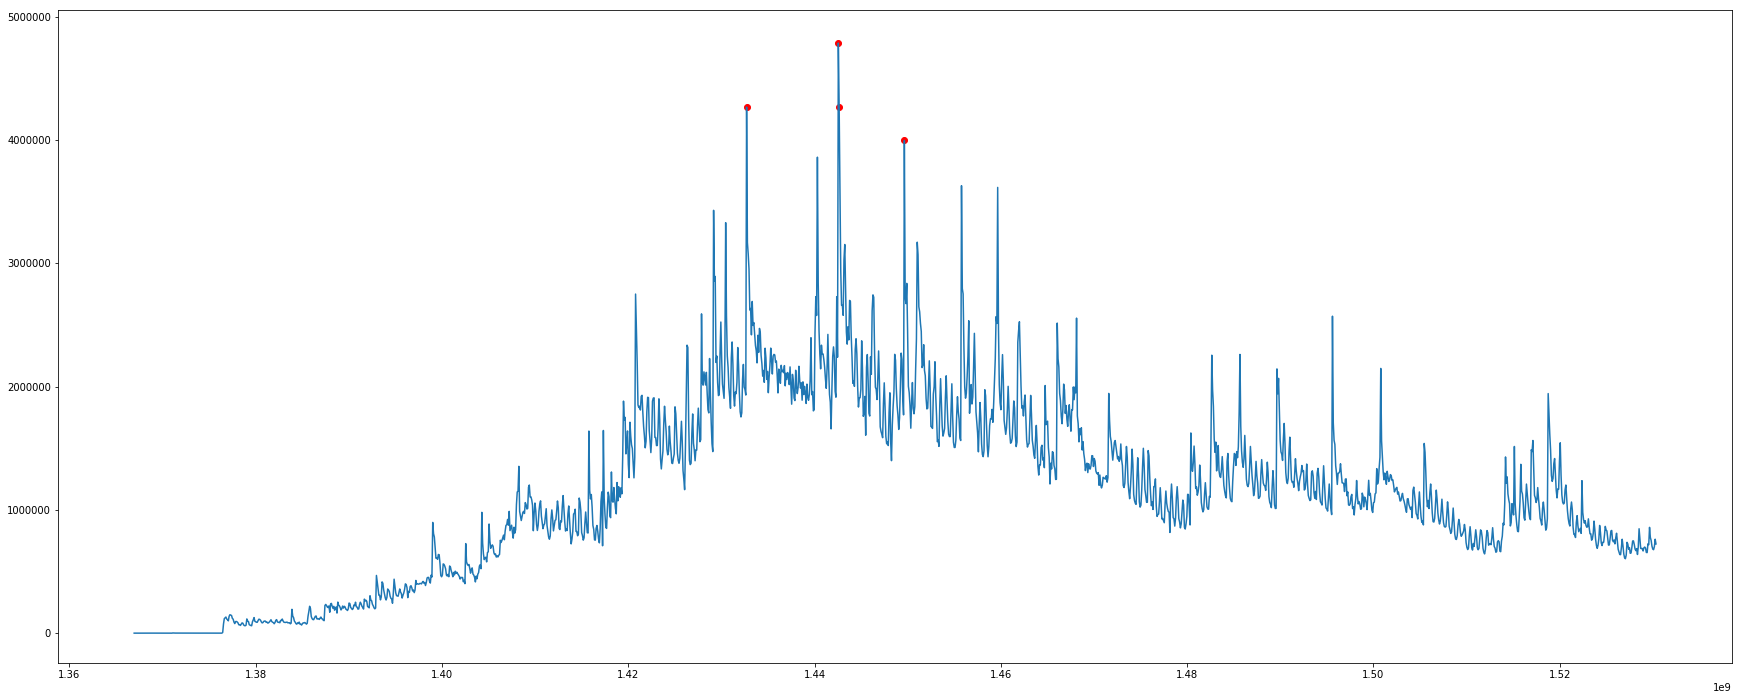

In [117]:
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(csgoecon.index, csgoecon.values)
ax.scatter(model['anoms']['timestamp'], model['anoms']['anoms'], c='r')

In [112]:
model['anoms']

,timestamp,anoms
timestamp,,
1432702800,1432702800,4265683.286
1442552400,1442552400,4784498.777
1442638800,1442638800,4270037.277
1449640800,1449640800,3995210.723


### CSGO price per transaction over time:

In [148]:
csgodf['approx_value'] = csgodf['median_sell_price'] * csgodf['quantity']
# for each day I need to divide the sum(approx val) by sum(quant) to get $/transaction for that day
csgo_plot = csgodf.groupby('date').agg({'approx_value':'sum', 'quantity':'sum'})

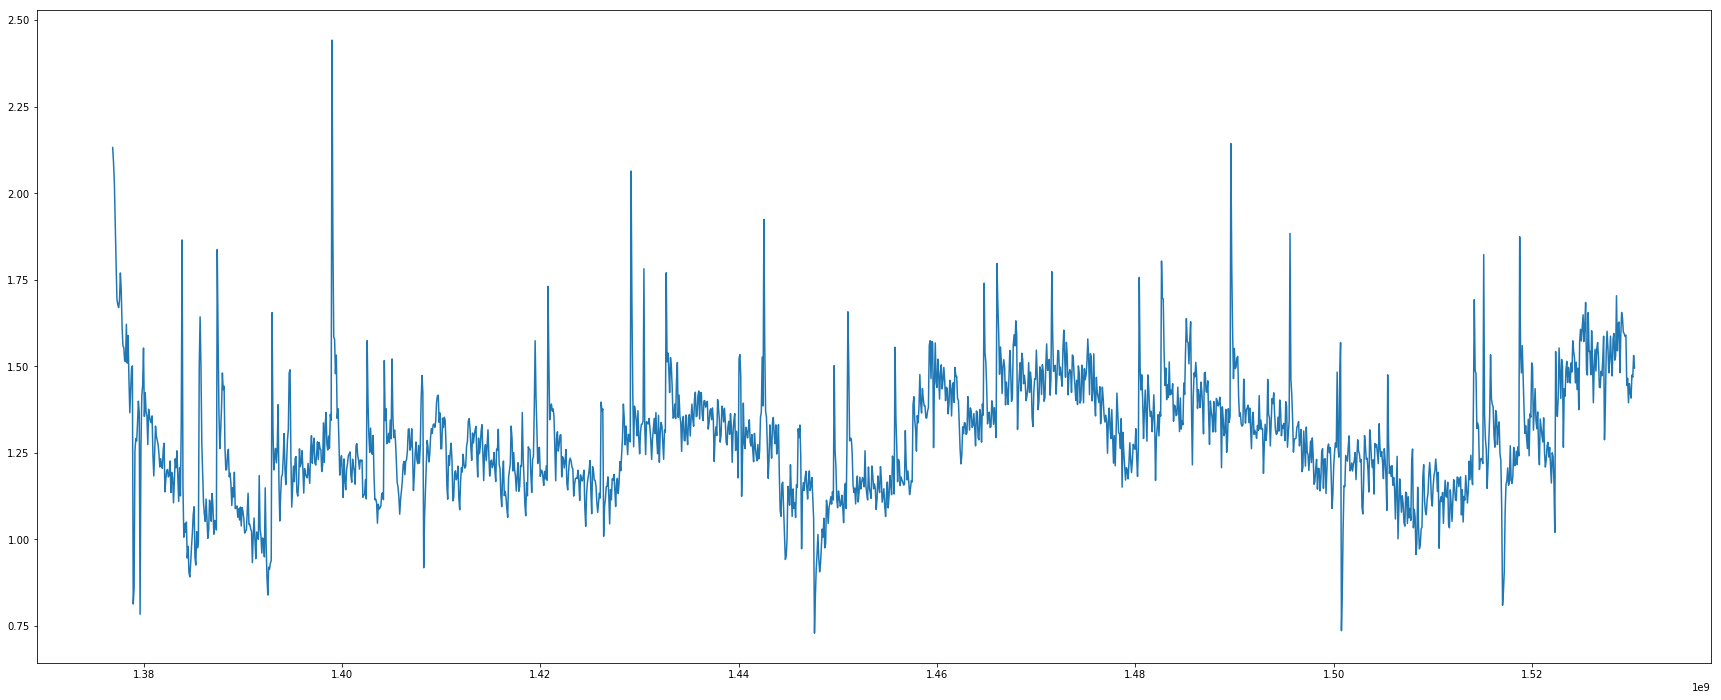

In [159]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.plot(csgo_plot.index[115:], (csgo_plot.approx_value.values/csgo_plot.quantity.values)[115:])

In [2]:
with open('data/cs_df_M.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
min(df.est_release_str)

'01 Apr 2015'

In [9]:
df = df[df.item_name != 'Operation Payback Pass']

In [10]:
df[df.est_release == min(df.est_release)]

,item_name,date_str,median_sell_price,quantity,est_release_str,days_since_release,gun_type,skin,quality,gun_bool,StatTrak,souvenir,keys,capsules,stickers,date,est_release,timestamp
2462093,SG 553 | Tornado (Field-Tested),13 Aug 2013,0.570,1,13 Aug 2013,0,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376370e+09,1.376370e+09,2013-08-13
2462094,SG 553 | Tornado (Field-Tested),14 Aug 2013,3.610,6,13 Aug 2013,1,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376456e+09,1.376370e+09,2013-08-14
2462095,SG 553 | Tornado (Field-Tested),15 Aug 2013,1.059,109,13 Aug 2013,2,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376543e+09,1.376370e+09,2013-08-15
2462096,SG 553 | Tornado (Field-Tested),16 Aug 2013,0.564,229,13 Aug 2013,3,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376629e+09,1.376370e+09,2013-08-16
2462097,SG 553 | Tornado (Field-Tested),17 Aug 2013,0.432,272,13 Aug 2013,4,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376716e+09,1.376370e+09,2013-08-17
2462098,SG 553 | Tornado (Field-Tested),18 Aug 2013,0.369,310,13 Aug 2013,5,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376802e+09,1.376370e+09,2013-08-18
2462099,SG 553 | Tornado (Field-Tested),19 Aug 2013,0.357,249,13 Aug 2013,6,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376888e+09,1.376370e+09,2013-08-19
2462100,SG 553 | Tornado (Field-Tested),20 Aug 2013,0.300,254,13 Aug 2013,7,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.376975e+09,1.376370e+09,2013-08-20
2462101,SG 553 | Tornado (Field-Tested),21 Aug 2013,0.244,278,13 Aug 2013,8,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.377061e+09,1.376370e+09,2013-08-21
2462102,SG 553 | Tornado (Field-Tested),22 Aug 2013,0.180,386,13 Aug 2013,9,SG 553,Tornado,Field-Tested,True,False,False,False,False,False,1.377148e+09,1.376370e+09,2013-08-22
